In [2]:
###WORLD HAPPINESS REPORT TOP 50
##A look into Suicide Rates and Family Status for the Top 50 Happiest Countries in the World

In [163]:
#List Dependencies & Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as sts
import numpy as np
import random

# Study data files
top_50_path = "../Suicide_Report/2017.csv"
suicide_rate_path = "../Suicide_Report/clean_suicide.csv"

# Read the mouse data and the study results
top_50 = pd.read_csv(top_50_path)
clean_suicide = pd.read_csv(suicide_rate_path)

# Combine the data into a single dataset 
merged_df = pd.merge(top_50, clean_suicide, on="Country")

# Display the data table for preview
merged_df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Code,Death_rate
0,Norway,1.0,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28,NOR,9.27
1,Denmark,2.0,7.52,7.58,7.46,1.48,1.55,0.79,0.63,0.36,0.40,2.31,DNK,8.80
2,Iceland,3.0,7.50,7.62,7.39,1.48,1.61,0.83,0.63,0.48,0.15,2.32,ISL,9.61
3,Switzerland,4.0,7.49,7.56,7.43,1.56,1.52,0.86,0.62,0.29,0.37,2.28,CHE,9.32
4,Finland,5.0,7.47,7.53,7.41,1.44,1.54,0.81,0.62,0.25,0.38,2.43,FIN,12.94
5,Netherlands,6.0,7.38,7.43,7.33,1.50,1.43,0.81,0.59,0.47,0.28,2.29,NLD,9.17
6,Canada,7.0,7.32,7.38,7.25,1.48,1.48,0.83,0.61,0.44,0.29,2.19,CAN,10.91
7,New Zealand,8.0,7.31,7.38,7.25,1.41,1.55,0.82,0.61,0.50,0.38,2.05,NZL,11.30
8,Sweden,9.0,7.28,7.34,7.22,1.49,1.48,0.83,0.61,0.39,0.38,2.10,SWE,11.08
9,Australia,10.0,7.28,7.36,7.21,1.48,1.51,0.84,0.60,0.48,0.30,2.07,AUS,11.05


In [164]:
#Clean Up of data for specific analysis 

#Rename columns 
merged_df.columns = ['Country', 'Rank', 'Happy_Score', 'Top_Whisker','Low_Whisker','GDP','Family','Life','Freedom','Generosity','Trust_Gov','Dystopia','Country_Code','Suicide_Rate']
merged_df.head(10)

#Pull specific columns that will be used in analysis
clean_df = merged_df[['Rank','Country_Code','Country','Happy_Score','Family','Suicide_Rate']]

#To round and format values correctly in table
#clean_df["Rank"] = clean_df["Rank"].map("#{:.0f}".format)
#clean_df
#getting a warning: value is trying to be set on a copy of a slice from a DataFrame.
clean_df.head(10)

,Rank,Country_Code,Country,Happy_Score,Family,Suicide_Rate
0,1.0,NOR,Norway,7.54,1.53,9.27
1,2.0,DNK,Denmark,7.52,1.55,8.80
2,3.0,ISL,Iceland,7.50,1.61,9.61
3,4.0,CHE,Switzerland,7.49,1.52,9.32
4,5.0,FIN,Finland,7.47,1.54,12.94
5,6.0,NLD,Netherlands,7.38,1.43,9.17
6,7.0,CAN,Canada,7.32,1.48,10.91
7,8.0,NZL,New Zealand,7.31,1.55,11.30
8,9.0,SWE,Sweden,7.28,1.48,11.08
9,10.0,AUS,Australia,7.28,1.51,11.05


In [165]:
#SUICIDE RATE: Create plots to compare suicide rates with top 50 countries 
#Scatter Plot with linear Regression and Correlation Coefficients
#Line Plots
#Bar Plots Vertical 
#Pie Chart 
#IF TIME PERMITS REGIONAL VIEW OF SUICICDE RATE VERSUS HAPPINESS

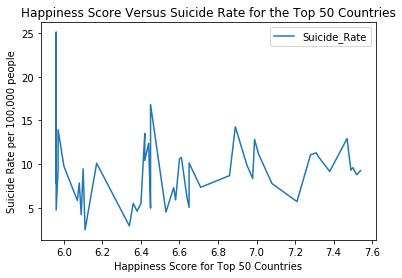

In [166]:
#Line Plot of Suicide Rate vs. Country Happy Score 
clean_df.plot(x='Happy_Score',y='Suicide_Rate',kind ='line')
plt.title('Happiness Score Versus Suicide Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Suicide Rate per 100,000 people')
plt.show()

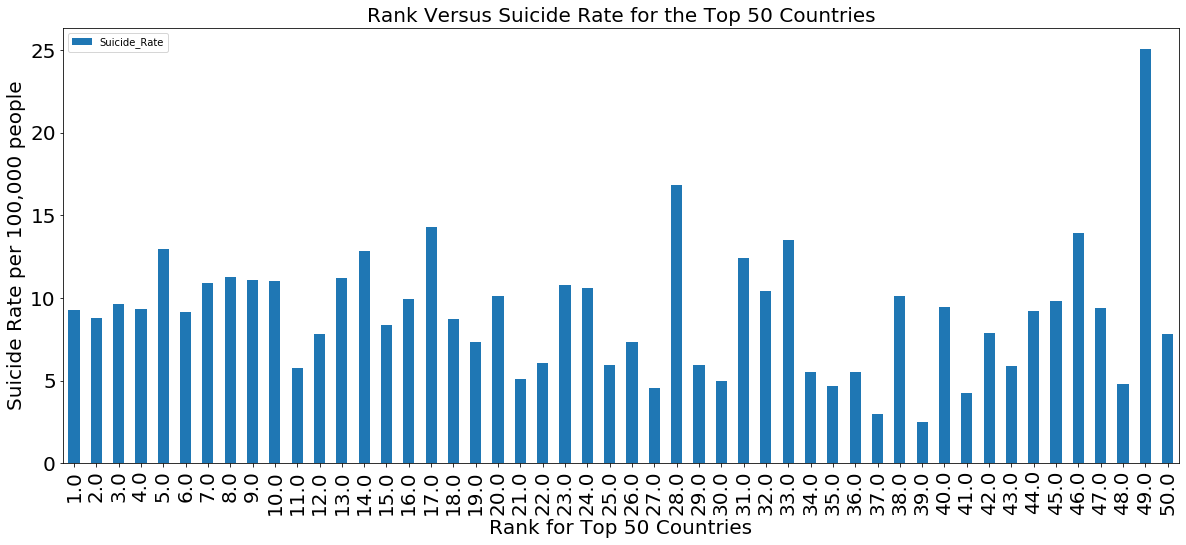

In [167]:
#Vertical Bar Plot of Suicide Rate vs. Country Rank

#OPTION 1 TO VISUALIZE DATA
clean_df.plot(x ='Rank', y='Suicide_Rate', kind = 'bar',figsize=(20,8), fontsize=20)
plt.title('Rank Versus Suicide Rate for the Top 50 Countries', fontsize=20)
plt.xlabel('Rank for Top 50 Countries', fontsize=20)
plt.ylabel('Suicide Rate per 100,000 people', fontsize=20)
plt.show()


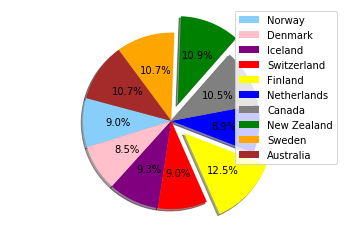

In [168]:
#Pie Chart of TOP 10 Countries: Suicide Rate vs. Country Happy Score 
#Data layout
labels = 'Norway','Denmark','Iceland','Switzerland','Finland','Netherlands','Canada','New Zealand','Sweden','Australia'
sizes = [9.27,8.80,9.61,9.32,12.94,9.17,10.91,11.30,11.08,11.05]
colors = ['lightskyblue', 'pink', 'purple', 'red', 'yellow', 'blue', 'gray','green', 'orange','brown']
explode = (0, 0,0,0,0.2,0,0,0.2,0,0)
plt.pie(sizes,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 165)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

---------------------------------------
The r-squared is: 0.011273778031702136
---------------------------------------


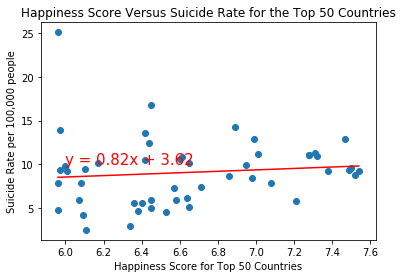

In [169]:
#Scatter Plot of Suicide Rate vs. Country Happy Score 
# Add the linear regression equation and line to plot
x_values = clean_df['Happy_Score']
y_values = clean_df['Suicide_Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Happiness Score Versus Suicide Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Suicide Rate per 100,000 people')
#correlation = sts.pearsonr('Happy_Score','Suicide_Rate')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
print("---------------------------------------")
print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
plt.show()

In [170]:
#FAMILY STATUS: Create plots to compare suicide rates with top 50 countries 
#Scatter Plot with linear Regression and Correlation Coefficients
#Line Plots
#Bar Plots Vertical 
#Pie Chart 
#IF TIME PERMITS REGIONAL VIEW OF FAMILY VERSUS HAPPINESS 

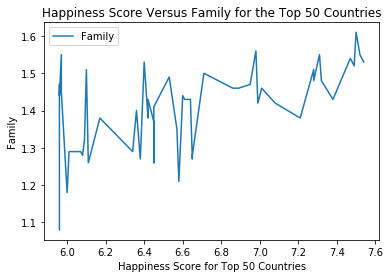

In [171]:
#Line Plot of Family vs. Country Happy Score 
clean_df.plot(x='Happy_Score',y='Family',kind ='line')
plt.title('Happiness Score Versus Family for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Family')
plt.show()

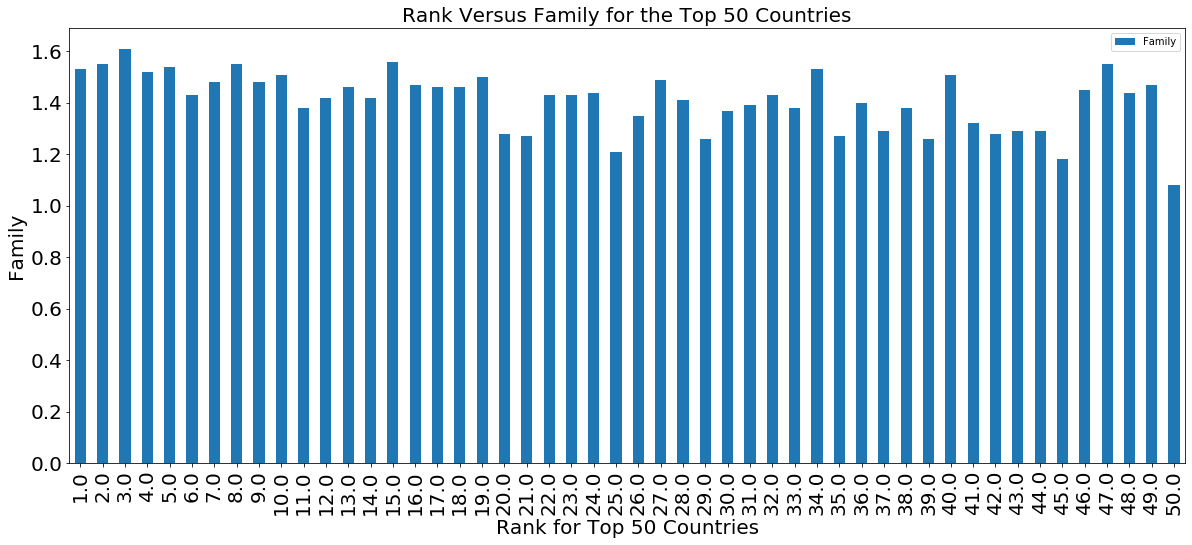

In [172]:
#Bar Plot of Family vs. Country Rank
#OPTION 1 TO VISUALIZE DATA
clean_df.plot(x ='Rank', y='Family', kind = 'bar',figsize=(20,8), fontsize=20)
plt.title('Rank Versus Family for the Top 50 Countries', fontsize=20)
plt.xlabel('Rank for Top 50 Countries', fontsize=20)
plt.ylabel('Family', fontsize=20)
plt.show()

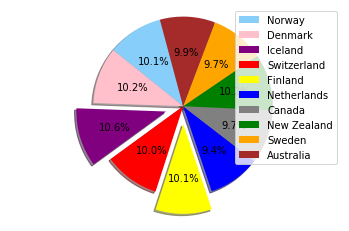

In [173]:
#Pie Chart of TOP 10 Countries: Family vs. Country Happy Score 
#Data layout
labels = 'Norway','Denmark','Iceland','Switzerland','Finland','Netherlands','Canada','New Zealand','Sweden','Australia'
sizes = [1.53,1.55,1.61,1.52,1.54,1.43,1.48,1.55,1.48,1.51]
colors = ['lightskyblue', 'pink', 'purple', 'red', 'yellow', 'blue', 'gray','green', 'orange','brown']
explode = (0, 0,0.2,0,0.2,0,0,0,0,0)
plt.pie(sizes,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 105)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

---------------------------------------
The r-squared is: 0.3147588296592885
---------------------------------------


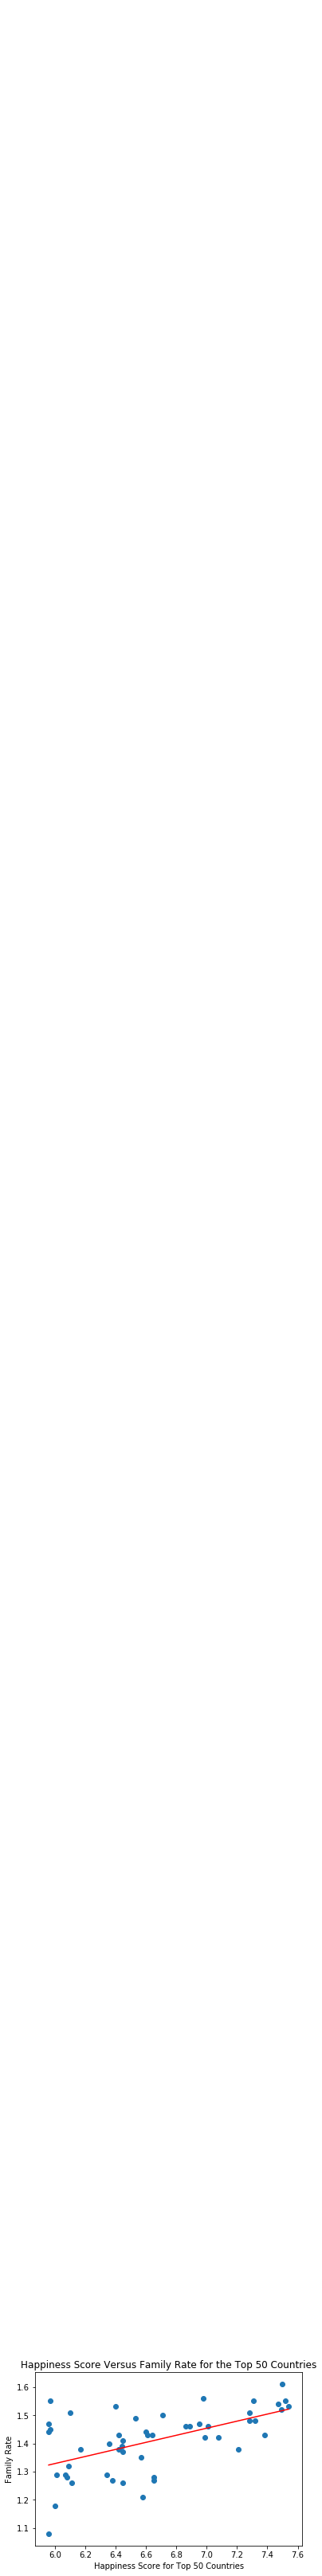

In [174]:
#Scatter Plot of Family vs. Country Happy Score 
# Add the linear regression equation and line to plot
x_values = clean_df['Happy_Score']
y_values = clean_df['Family']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Happiness Score Versus Family Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Family Rate')
#correlation = sts.pearsonr('Happy_Score','Family')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
print("---------------------------------------")
print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
plt.show()